In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, linear_model, model_selection

df = pd.read_csv('student_study_hours.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


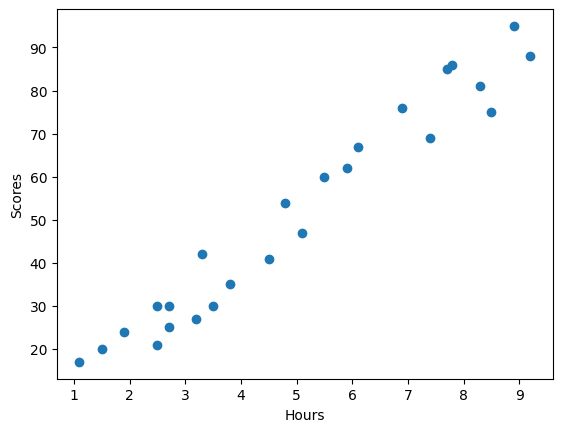

In [16]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.draw()

In [17]:
df['Hours'].corr(df['Scores'])

np.float64(0.9761906560220887)

In [18]:
X = df['Hours'].values
X = X.reshape(-1,1) #ilość rzedow i ilosc kolumn -> -1 oznacza ustaw sobie sam
print(type(X))
print(X.shape)
y = df['Scores']

<class 'numpy.ndarray'>
(25, 1)


In [19]:
X_train, X_test, y_train, y_test =model_selection.train_test_split(X,y,test_size=0.2)


In [20]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
X_test

array([[6.9],
       [5.9],
       [4.8],
       [5.1],
       [7.7]])

In [22]:
y_test

23    76
11    62
21    54
1     47
10    85
Name: Scores, dtype: int64

In [23]:
predictions = model.predict(X_test)
predictions

array([68.6787693 , 59.15265826, 48.67393611, 51.53176942, 76.29965814])

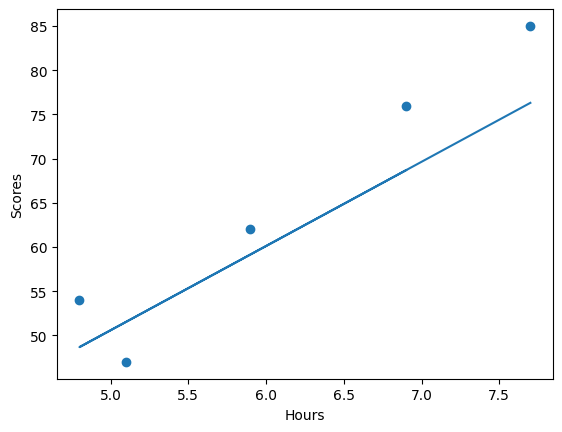

In [24]:
plt.scatter(X_test,y_test)
plt.plot(X_test,predictions)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.draw()

In [25]:
b = model.intercept_ #wysoksc
a = model.coef_[0] #slope

print(b) # dla osoby z 0h nauki = 2.6 
print(a) # za każdą godzine nauki przyznaje przyznaje 9.6 punkta

2.9486030885299925
9.526111045620654


In [26]:
import numpy as np
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print(f'RMSE = {rmse} ({rmse/np.mean(predictions)*100:3.3}%)')


RMSE = 6.104221704190912 (10.0%)


In [27]:
pre_train_r2 = model.score(X_train, y_train)
pre_test_r2 = model.score(X_test, y_test)
print('Model determination train: ', pre_train_r2 )
print('Model determination test: ', pre_test_r2 )

Model determination train:  0.9577180145857307
Model determination test:  0.8088760637365849


In [28]:
model.predict([[2.5]])

array([26.7638807])